#KNN

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read in the data using pandas
url = 'https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/pima_indians_diabetes.csv'
df = pd.read_csv(url)
#check data has been read in properly
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Data cleaning
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in zero_not_accepted :
  df[column] = df[column].replace(0,np.NaN)
  mean = int (df[column].mean(skipna=True))
  df[column] = df[column].replace(np.NaN,mean)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['Outcome'])
#check that the target variable has been removed
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
#separate target values
y = df['Outcome'].values
#view target values
y[0:5]

array([1, 0, 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 23)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 1, 0])

In [ ]:
#check accuracy of our model on the test data
a = knn.score(X_test, y_test)
a

0.7142857142857143

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=23)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.74025974 0.68831169 0.74675325 0.77124183 0.79738562]
cv_scores mean:0.7487904252610134


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 23}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7487904252610134

In [ ]:
# Calculating error for K values between 2 and 10
#error = []
#import matplotlib.pyplot as plt
#for i in range(2, 10):
 #   knn = KNeighborsClassifier(n_neighbors=i)
 #   knn.fit(X_train, y_train)
 #   pred_i = knn.predict(X_test)
 #   error.append(np.mean(pred_i != y_test))
#plt.figure(figsize=(12, 6))
#plt.plot(range(2, 10), error, color='red', linestyle='dashed', marker='o',
 #        markerfacecolor='blue', markersize=10)
#plt.title('Error Rate K Value')
#plt.xlabel('K Value')
#plt.ylabel('Mean Error')

# Naive Bayes

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[83 17]
 [24 30]]
accuracy_Naive Bayes: 0.734
precision_Naive Bayes: 0.734
recall_Naive Bayes: 0.734
f1-score_Naive Bayes : 0.734


#Decision Tree

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
c = metrics.accuracy_score(y_test, y_pred)
print ('Accuracy:', c)

Accuracy: 0.6623376623376623


# Ensemble Bagging
https://www.section.io/engineering-education/implementing-bagging-algorithms-in-python/

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/pima_indians_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Data cleaning
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in zero_not_accepted :
  df[column] = df[column].replace(0,np.NaN)
  mean = int (df[column].mean(skipna=True))
  df[column] = df[column].replace(np.NaN,mean)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [ ]:
X = df.drop("Outcome",axis="columns")
y = df.Outcome

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled[:3]

array([[ 0.63994726,  0.86525364, -0.03198993,  0.67064253, -0.00331014,
         0.16724016,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20601255, -0.5283186 , -0.01230129, -0.00331014,
        -0.85155088, -0.36506078, -0.19067191],
       [ 1.23388019,  2.01595708, -0.69376149, -0.01230129, -0.00331014,
        -1.33183808,  0.60439732, -0.10558415]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)


In [ ]:
X_train.shape

(576, 8)

In [ ]:
X_test.shape

(192, 8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.70779221, 0.63636364, 0.68181818, 0.80392157, 0.76470588])

In [ ]:
scores.mean()

0.7189202953908836

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [ ]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [ ]:
bag_model.oob_score_

0.7517361111111112

In [ ]:
d = bag_model.score(X_test, y_test)
d

0.8125

In [ ]:
import matplotlib

<function matplotlib.pyplot.show(*args, **kw)>

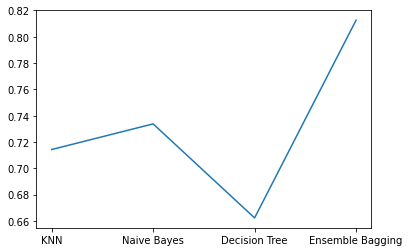

In [ ]:
#membuat grafik

x = np.array(['KNN','Naive Bayes','Decision Tree','Ensemble Bagging'])
y = np.array([a,accuracy,c,d])

plt.plot(x,y)
plt.show

In [ ]:
%%shell

UsageError: %%shell is a cell magic, but the cell body is empty. Did you mean the line magic %shell (single %)?
